In [119]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy import integrate

In [195]:
#problem 1

#i apologize for the lack of plots in this assignment, I'm cutting it real close and need to submit

expvals = np.linspace(-1,-12,23)
for i in expvals:
    dx = 10**i
    deriv1 = (2*np.exp(dx)-2*np.exp(-dx)+np.exp(2*dx)-np.exp(-2*dx))/(8*dx)
    diff1 = np.abs(np.exp(0)-deriv1)
    deriv2 = (2*np.exp(0.01*dx)-2*np.exp(-0.01*dx)+np.exp(2*0.01*dx)-np.exp(-2*0.01*dx))/(8*dx)
    diff2 = np.abs(0.01*np.exp(0)-deriv2)
    print(i,diff1,diff2)
    
#dx should be on the order (10**-8)**(1/3) ~ 10**(-3). however, since we neglected 
#quintic terms and above
#and we assume f and f''' are on the same order of magnitude, i would guess there's much error.
#we can see that for e**x the discrepancy is minimized at dx ~ 10**(-5.5). 
#for e**(0.01x) the discrepancy is minimized at ~ 10**(-3.5).


-1.0 0.0041737564519555015 4.166667436425464e-09
-1.5 0.0004167375064489942 4.1666651899585627e-10
-2.0 4.166737500255202e-05 4.166834412233644e-11
-2.5 4.166673750471972e-06 4.159384642266062e-12
-3.0 4.166667435523408e-07 3.8470095164999663e-13
-3.5 4.166665190652452e-08 1.6601303665098044e-14
-4.0 4.166834433050326e-09 1.2877719723913827e-13
-4.5 4.1593839483766715e-10 9.488781288480297e-13
-5.0 3.8470115981681374e-11 1.1002223437861502e-12
-5.5 1.660227511024459e-12 3.1431489355693287e-12
-6.0 1.2877698907232116e-11 4.689692210957386e-11
-6.5 9.488776431254564e-11 9.340477176433826e-11
-7.0 1.1002221356193331e-10 5.263558686130487e-12
-7.5 3.143147964124182e-10 1.3109286156609556e-09
-8.0 4.689692190140704e-09 8.274037097827369e-10
-8.5 9.34047705847263e-09 8.720744335000141e-10
-9.0 5.263559588186695e-10 8.274037097827369e-10
-9.5 1.3109286167711787e-07 3.8624802087619536e-08
-10.0 8.274037099909037e-08 5.6338554941040564e-08
-10.5 8.720744326673469e-08 7.074273099833689e-07
-11.0

In [196]:
#problem 2


import warnings
warnings.simplefilter('ignore', np.RankWarning)

diodedata = np.transpose(np.loadtxt('Documents/gitdirectory/phys512-2020/problem_sets/lakeshore.txt'))

#cubic polyfit as done in class
temp = np.linspace(diodedata[0][1],diodedata[0][-1],10000)
v_interp = [0]*len(temp)
params_diode = [0]*len(temp)
eval_diode = [0]*len(temp)
ind = [0]*len(temp)
#continued
for i in range(len(temp)):
    ind[i] = np.max(np.where(temp[i]>=diodedata[0])[0])
    temp_use = diodedata[0][ind[i]-1:ind[i]+3]
    v_use = diodedata[1][ind[i]-1:ind[i]+3]
    params_diode[i] = np.polyfit(temp_use,v_use,3)
    eval_diode[i] = np.polyval(params_diode[i],temp[i])
    v_interp[i] = eval_diode[i]

#temp_query is the temperature that we wish to interpolate
#finds the point nearest the temp_query in the array of 10000 and gives the voltage value from the part above
temp_query = 314.14159
temp_array = np.zeros(len(temp))
for i in range(len(temp)):
    temp_array[i] = np.abs(temp[i]-temp_query)
number = temp_array.argmin()
print('my interpolated voltage is ',v_interp[number])


x_ish = [0]*(len(diodedata[0]))
#2d array of length 144*10000
temp_array2 = np.zeros((len(diodedata[0]),len(temp)))
goodtemps = [0]*len(diodedata[0])

for i in range(len(diodedata[0])-1):
    #for each true temperature value, find the nearest value in the array of length 10000
    for j in range(len(temp)):
        temp_array2[i][j] = np.abs(diodedata[0][i+1]-temp[j])
    goodtemps[i] = temp_array2[i].argmin()

#calculate the std deviation
sumsquares = 0
for i in range(len(diodedata[0])-1):
    sumsquares = sumsquares + (diodedata[1][i]-v_interp[goodtemps[i]])**2
print('my rms error is ', np.sqrt(sumsquares/(len(diodedata[0])-1)))


    
    


my interpolated voltage is  0.5269532605692218
my rms error is  0.013653039415440488


In [48]:
#problem 3


#def stuff for the cosine part
x_cos = np.linspace(-np.pi/2,np.pi/2,20)
y_cos = np.zeros(len(x_cos))
for i in range(len(x_cos)):
    y_cos[i] = np.cos(x_cos[i])

In [69]:
#cubic polynomial fit
x_cos1001 = np.linspace(x_cos[1],x_cos[-1],1001)
xx_cos1001 = np.linspace(x_cos[0],x_cos[-1],1001)
y_true = np.cos(xx_cos1001)

#get parameters from the shortened array 
y_interp = np.zeros(len(x_cos1001))
for i in range(len(x_cos1001)):
    ind = np.max(np.where(x_cos1001[i]>=x_cos)[0])
    x_use = x_cos[ind-1:ind+3]
    y_use = y_cos[ind-1:ind+3]
    pars = np.polyfit(x_use,y_use,3)
#use full array here
    pred = np.polyval(pars,xx_cos1001[i])
    y_interp[i] = pred

print('my rms error is ',np.std(y_interp-y_true))


my rms error is  2.8479272586395743e-05


In [70]:
#spline fit
#nice and easy
spln = interpolate.splrep(x_cos,y_cos)
yy = interpolate.splev(xx_cos1001,spln)

print('my rms error is ',np.std(yy-y_true))

my rms error is  1.1424124183107988e-06


my rms error is  0.14973579630471723


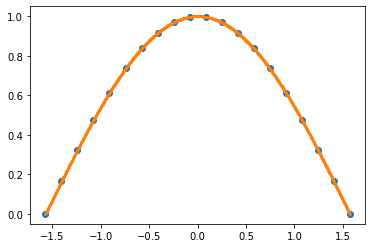

In [216]:
#rat fit
#fairly certain this should be the most accurate of the three
def rat_eval(p,q,x):
    top=0
    for i in range(len(p)):
        top=top+p[i]*x**i
    bot=1
    for i in range(len(q)):
        bot=bot+q[i]*x**(i+1)
    return top/bot

def rat_fit(x,y,n,m):
    assert(len(x)==n+m-1)
    assert(len(y)==len(x))
    mat=np.zeros([n+m-1,n+m-1])
    for i in range(n):
        mat[:,i]=x**i
    for i in range(1,m):
        mat[:,i-1+n]=-y*x**i
    pars=np.dot(np.linalg.inv(mat),y)
    p=pars[:n]
    q=pars[n:]
    return p,q

n = 3
m = 18
p,q = rat_fit(x_cos,y_cos,n,m)
pred = rat_eval(p,q,xx_cos1001)

print('my rms error is ',np.std(pred-y_true))

plt.scatter(x_cos,y_cos)
plt.scatter(xx_cos1001,pred,s=3)

In [42]:
#def stuff for the lorentzian
x_lor = np.linspace(-1,1,9)
y_lor = np.zeros(len(x_lor))
for i in range(len(x_lor)):
    y_lor[i] = np.cos(x_lor[i])
    
def lor(x):
    return 1/(1+x**2)

my rms error is  0.03184264277054447


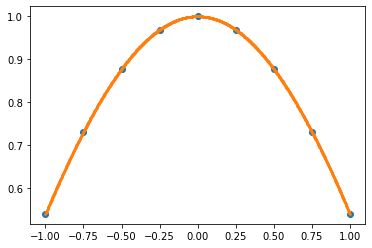

In [76]:
#cubic polynomial fit
x_lor1001 = np.linspace(x_lor[1],x_lor[-1],1001)
xx_lor1001 = np.linspace(x_lor[0],x_lor[-1],1001)
y_true = lor(xx_lor1001)
y_interp = np.zeros(len(x_lor1001))
for i in range(len(x_cos1001)):
    ind = np.max(np.where(x_lor1001[i]>=x_lor)[0])
    x_use = x_lor[ind-1:ind+3]
    y_use = y_lor[ind-1:ind+3]
    pars = np.polyfit(x_use,y_use,3)
    pred = np.polyval(pars,xx_lor1001[i])
    y_interp[i] = pred

print('my rms error is ',np.std(y_interp-y_true))

plt.scatter(x_lor,y_lor)
plt.scatter(xx_lor1001,y_interp,s=3)

In [77]:
#spline fit
spln = interpolate.splrep(x_lor,y_lor)
yy = interpolate.splev(xx_lor1001,spln)

print('my rms error is ',np.std(yy-y_true))

my rms error is  0.031821701686346134


In [220]:
#rat fit
#the Maclaurin series of 1/(1+x**2) is 1 - x**2 + x**4 ...
#this is probably part of the reason why the p,q values tend to blow up at 
#even numbers of n and m. it must be creating a singular matrix. 
#when we switch to np.linalg.pinv the divergent values of q disappear and
#the accuracy of the rational fit is maintained.
n = 4
m = 6
p,q = rat_fit(x_lor,y_lor,n,m)
pred = rat_eval(p,q,xx_lor1001)

print('my rms error is ',np.std(pred-y_true))

my rms error is  0.18920239209715312


In [219]:
#problem 4


#define the function to integrate (outside of sphere)
Z=2
R=1
def dE(theta,Z,R):
        return np.sin(theta)*(Z-R*np.cos(theta))/(R**2+Z**2-2*R*Z*np.cos(theta))**(3/2)
    
#must manually input values for R and Z    
def dE_step(theta):
        return np.sin(theta)*(2-2*np.cos(theta))/(2**2+2**2-2*2*2*np.cos(theta))**(3/2)
    

In [186]:
#the 'args' part is setting the values of R and Z
scipy.integrate.quad(dE,0,np.pi,args=(2,2))

#in units of sigma*R**2/(2*epsilon_0) of course

(0.25000000000000216, 2.7755575615629154e-15)

In [221]:
#step integrator
def integrate_step(fun,x1,x2,tol):
    x=np.linspace(x1,x2,5)
    y=fun(x)
    area1=(x2-x1)*(y[0]+4*y[2]+y[4])/6
    area2=(x2-x1)*( y[0]+4*y[1]+2*y[2]+4*y[3]+y[4])/12
    myerr=np.abs(area1-area2)
    if myerr<tol:
        return area2
    else:
        xm=0.5*(x1+x2)
        a1=integrate_step(fun,x1,xm,tol/2)
        a2=integrate_step(fun,xm,x2,tol/2)
        return a1+a2

ans=integrate_step(dE_step,0,np.pi,0.001)
print(ans)
 
#at Z=R, the quad properly integrates to the correct value, as well as inside and outside 
#the sphere. At Z=R, there is a singularity in the integral, which causes the step integrator
#to fail. I guess this means quad does not have to evaluate dE at theta = 0, and uses a
#different, more robust method altogether.

<ipython-input-219-16ae4dc517f7>:9: RuntimeWarning: invalid value encountered in true_divide
  return np.sin(theta)*(2-2*np.cos(theta))/(2**2+2**2-2*2*2*np.cos(theta))**(3/2)


RecursionError: maximum recursion depth exceeded while calling a Python object